In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
df=pd.read_csv(url,sep=',')
print(df.head())

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  


Text(0, 0.5, 'Price')

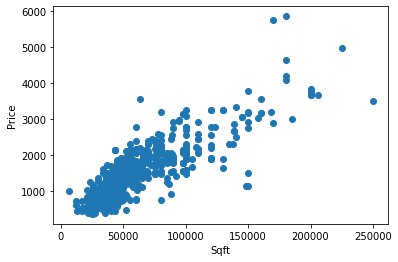

In [3]:
plt.scatter(df.Price,df['Sqft'])
plt.xlabel('Sqft')
plt.ylabel('Price')

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Sqft','Price']])
y_predicted

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1,

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Price']])
df['Price'] = scaler.transform(df[['Price']])

scaler.fit(df[['Sqft']])
df['Sqft'] = scaler.transform(df[['Sqft']])
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
0,1,0.148867,2,7,2,2,2,0.229192,0
1,2,0.322977,5,7,4,2,2,0.294793,1
2,3,0.141748,5,7,2,2,1,0.212792,0
3,4,0.200000,2,7,3,2,2,0.159492,0
4,5,0.110680,11,14,3,2,2,0.159492,0


In [13]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
0,1,0.148867,2,7,2,2,2,0.229192,0
1,2,0.322977,5,7,4,2,2,0.294793,1
2,3,0.141748,5,7,2,2,1,0.212792,0
3,4,0.200000,2,7,3,2,2,0.159492,0
4,5,0.110680,11,14,3,2,2,0.159492,0


In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Sqft','Price']])
    sse.append(km.inertia_)
sse

[26.297366165676898,
 11.682696331471345,
 6.4118830153515685,
 4.611271567744332,
 3.691488065119269,
 3.02714150205791,
 2.586301690040691,
 2.3230206025082465,
 2.113593431419303]

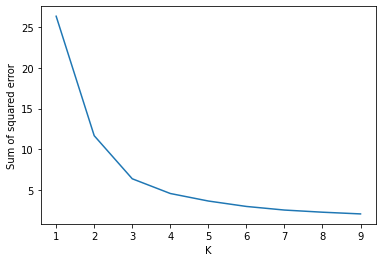

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
# as seen above graph we could conclude the optimal value of k is 3

[[0.12502494 0.14119582]
 [0.2941078  0.29973836]
 [0.55535599 0.63972109]]


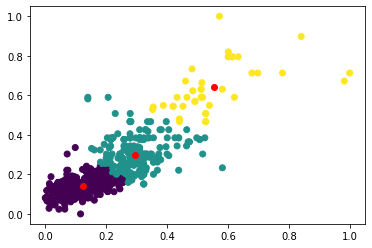

In [23]:
data = pd.DataFrame(df, columns=('Sqft', 'Price'))
data.head()

kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data['Sqft'], data['Price'], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()